In [106]:
import numpy as np
import pandas as pd
%matplotlib inline

In [107]:
arr = np.random.randint(10,20,(20,3))

In [108]:
df = pd.DataFrame(arr,columns=['A','B','C'])

In [109]:
df['A'][df['A']%7 == 0] = np.NAN
df['B'][df['B']%5 == 0] = np.NAN
df['C'][df['C']%4 == 0] = np.NAN

<ipython-input-109-15ee8481e302>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['B'][df['B']%5 == 0] = np.NAN
<ipython-input-109-15ee8481e302>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C'][df['C']%4 == 0] = np.NAN


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       19 non-null     float64
 1   B       14 non-null     float64
 2   C       16 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes


In [111]:
#df.A.fillna(100,inplace=True)
df.A.fillna(200)
df.A.fillna({7:2,1:3}) 

0     18.0
1     19.0
2     16.0
3     18.0
4     12.0
5     17.0
6     11.0
7     12.0
8     19.0
9      NaN
10    17.0
11    18.0
12    16.0
13    18.0
14    10.0
15    11.0
16    13.0
17    17.0
18    19.0
19    13.0
Name: A, dtype: float64

In [112]:
df.A.mean()

15.473684210526315

In [113]:
df.A.var()

9.818713450292396

In [114]:
df.A.std()

3.133482639219882

In [115]:
df.A.mode()

0    18.0
dtype: float64

In [116]:
df.A.median()

17.0

In [117]:
s1 = pd.Series(np.random.normal(5,10,100))
df['B'].fillna(s1,inplace=True)

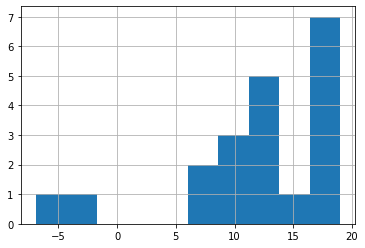

In [118]:
df.B.hist()

In [119]:
print(df.A)
print(df.A.fillna(method='ffill'))

0     18.0
1     19.0
2     16.0
3     18.0
4     12.0
5     17.0
6     11.0
7     12.0
8     19.0
9      NaN
10    17.0
11    18.0
12    16.0
13    18.0
14    10.0
15    11.0
16    13.0
17    17.0
18    19.0
19    13.0
Name: A, dtype: float64
0     18.0
1     19.0
2     16.0
3     18.0
4     12.0
5     17.0
6     11.0
7     12.0
8     19.0
9     19.0
10    17.0
11    18.0
12    16.0
13    18.0
14    10.0
15    11.0
16    13.0
17    17.0
18    19.0
19    13.0
Name: A, dtype: float64


In [120]:
df.A.interpolate()

0     18.0
1     19.0
2     16.0
3     18.0
4     12.0
5     17.0
6     11.0
7     12.0
8     19.0
9     18.0
10    17.0
11    18.0
12    16.0
13    18.0
14    10.0
15    11.0
16    13.0
17    17.0
18    19.0
19    13.0
Name: A, dtype: float64

In [121]:
df = pd.read_csv("pupils1.csv")

In [122]:
df.head()

,Name,Gender,City,Height,Weight,Avg Grades
0,adar,M,TLV,113,30,70
1,agam,F,Haifa,172,71,92
2,avi,M,Aco,143,58,82
3,dani,M,TLV,160,70,90
4,dina,F,Haifa,110,26,64


In [123]:
df.City.value_counts()

Haifa    4
TLV      3
Aco      2
Name: City, dtype: int64

In [124]:
df.City.unique()

array(['TLV', 'Haifa', 'Aco'], dtype=object)

In [125]:
df.City.nunique()

3

In [126]:
pd.Categorical(df.City)

[TLV, Haifa, Aco, TLV, Haifa, Aco, TLV, Haifa, Haifa]
Categories (3, object): [Aco, Haifa, TLV]

In [127]:
df['Gender'] = pd.Categorical(df['Gender']).codes

In [128]:
pd.get_dummies(df['City'])

,Aco,Haifa,TLV
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,0,1,0
8,0,1,0


In [129]:
df2 = pd.get_dummies(df,columns=['City'],drop_first=True)

In [130]:
df2

,Name,Gender,Height,Weight,Avg Grades,City_Haifa,City_TLV
0,adar,1,113,30,70,0,1
1,agam,0,172,71,92,1,0
2,avi,1,143,58,82,0,0
3,dani,1,160,70,90,0,1
4,dina,0,110,26,64,1,0
5,efrat,0,115,33,75,0,0
6,ehud,1,155,66,85,0,1
7,eli,1,155,61,84,1,0
8,ester,0,130,48,79,1,0
